In [17]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import shutil

# Define the path to your test data directory and the destination directory
test_data_dir = "/Users/anishvirkhare/Downloads/archive/test"  # Replace with the actual path to your test data
filtered_test_dir = os.path.expanduser("/Users/anishvirkhare/Downloads/8_classes_test")

# List of classes to keep
selected_classes = ["Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions", 
                    "Warts Molluscum and other Viral Infections", 
                    "Tinea Ringworm Candidiasis and other Fungal Infections", 
                    "Nail Fungus and other Nail Disease",
                    "Psoriasis pictures Lichen Planus and related diseases", 
                    "Eczema Photos",
                    "Acne and Rosacea Photos",
                    "Seborrheic Keratoses and other Benign Tumors"]  # Replace with your class names

# Create the destination directory if it doesn't exist
if not os.path.exists(filtered_test_dir):
    os.makedirs(filtered_test_dir)

# Loop through the selected classes and copy only the relevant folders/files
for class_name in selected_classes:
    source_class_dir = os.path.join(test_data_dir, class_name)
    destination_class_dir = os.path.join(filtered_test_dir, class_name)

    if os.path.exists(source_class_dir):
        shutil.copytree(source_class_dir, destination_class_dir, dirs_exist_ok=True)
        print(f"Copied {class_name} to filtered test directory.")
    else:
        print(f"Class '{class_name}' not found in test data directory.")

print(f"Filtered test data saved to {filtered_test_dir}")


Copied Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions to filtered test directory.
Copied Warts Molluscum and other Viral Infections to filtered test directory.
Copied Tinea Ringworm Candidiasis and other Fungal Infections to filtered test directory.
Copied Nail Fungus and other Nail Disease to filtered test directory.
Copied Psoriasis pictures Lichen Planus and related diseases to filtered test directory.
Copied Eczema Photos to filtered test directory.
Copied Acne and Rosacea Photos to filtered test directory.
Copied Seborrheic Keratoses and other Benign Tumors to filtered test directory.
Filtered test data saved to /Users/anishvirkhare/Downloads/8_classes_test


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Random forest(8 classes)

In [20]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tqdm import tqdm

# Paths to training and testing datasets
TRAIN_DIR = "/Users/anishvirkhare/Downloads/8_classes_train"
TEST_DIR = "/Users/anishvirkhare/Downloads/8_classes_test"

# Function to load image data
def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
            # Skip .DS_Store files
            if img_name == ".DS_Store":
                continue

            img_path = os.path.join(class_path, img_name)
            try:
                # Load and resize the image
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten())  # Flatten for Random Forest
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training and test data
img_size = (128,128)  # Resize images
X_train, y_train = load_images_and_labels(TRAIN_DIR, img_size)
X_test, y_test = load_images_and_labels(TEST_DIR, img_size)

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform to ensure consistent encoding

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Save the model (optional)
import joblib
joblib.dump(rf_model, "/Users/anishvirkhare/Downloads/random_forest_8 classes.pkl")


Processing Seborrheic Keratoses and other Benign Tumors: 100%|█| 1371/1371 [00:0
Processing Eczema Photos: 100%|████████████| 1235/1235 [00:04<00:00, 268.45it/s]
Processing Psoriasis pictures Lichen Planus and related diseases: 100%|█| 1405/1
Processing Nail Fungus and other Nail Disease: 100%|█| 1040/1040 [00:03<00:00, 3
Processing Tinea Ringworm Candidiasis and other Fungal Infections: 100%|█| 1300/
Processing Warts Molluscum and other Viral Infections: 100%|█| 1086/1086 [00:03<
Processing Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1
Processing Seborrheic Keratoses and other Benign Tumors: 100%|█| 343/343 [00:01<
Processing Eczema Photos: 100%|██████████████| 309/309 [00:01<00:00, 282.06it/s]
Processing Psoriasis pictures Lichen Planus and related diseases: 100%|█| 352/35
Processing Nail Fungus and other Nail Disease: 100%|█| 261/261 [00:00<00:00, 297
Processing Tinea Ringworm Candidiasis and other Fungal Infections: 100%|█| 325/3
Processing Warts Molluscum a

['/Users/anishvirkhare/Downloads/random_forest_8 classes.pkl']

Accuracy: 46.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       312
           1       0.40      0.32      0.35       288
           2       0.47      0.48      0.48       309
           3       0.67      0.52      0.59       261
           4       0.32      0.34      0.33       352
           5       0.41      0.52      0.46       343
           6       0.38      0.36      0.37       325
           7       0.38      0.30      0.33       272

    accuracy                           0.47      2462
   macro avg       0.47      0.47      0.46      2462
weighted avg       0.46      0.47      0.46      2462


Confusion Matrix:


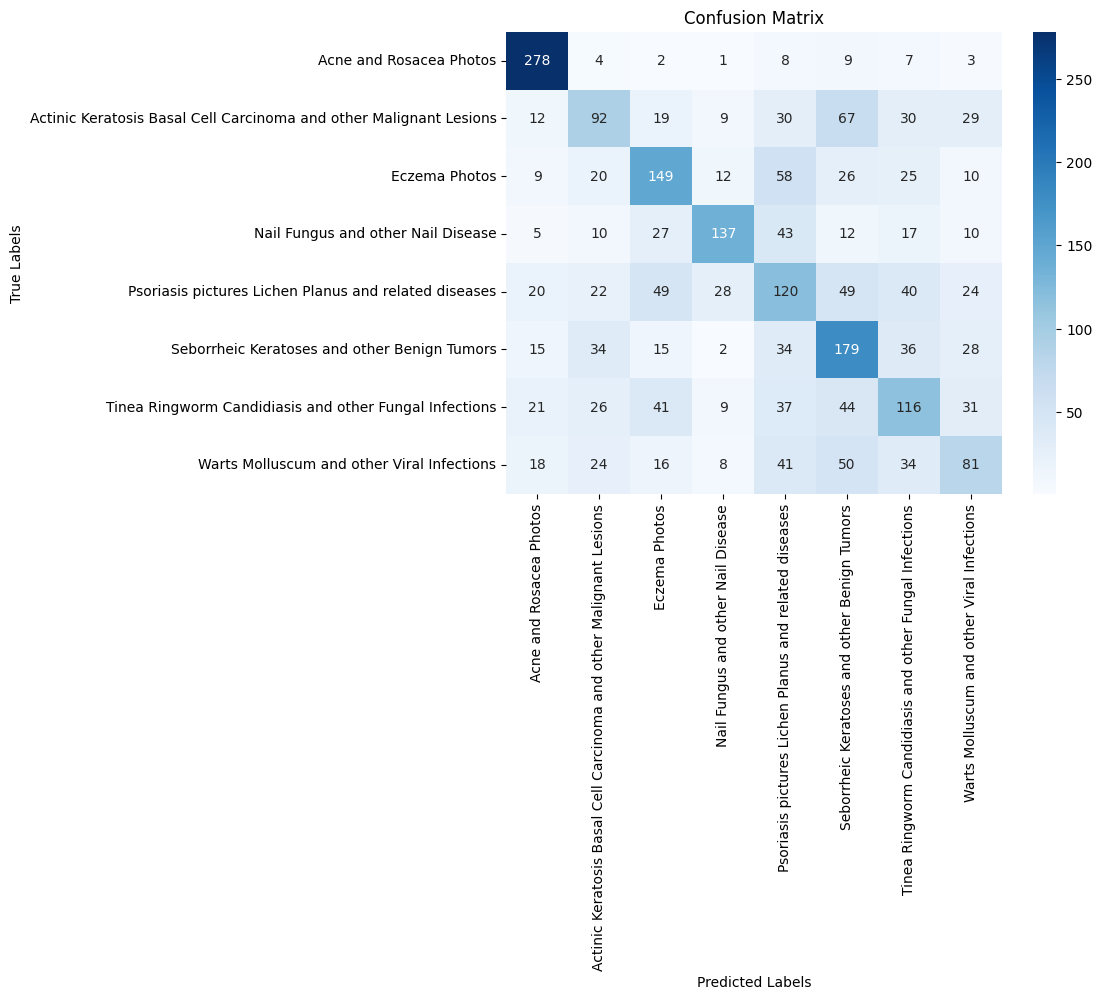

In [22]:
import joblib
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
rf_model = joblib.load("/Users/anishvirkhare/Downloads/random_forest_8 classes.pkl")

# Function to evaluate the model
def evaluate_model(model, X_test, y_test_encoded):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report (precision, recall, f1-score)
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate the model on the test data
evaluate_model(rf_model, X_test, y_test_encoded)


# Random Forest (Best classes)

In [23]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tqdm import tqdm

# Paths to training and testing datasets
TRAIN_DIR = "/Users/anishvirkhare/Downloads/best_classes_train"
TEST_DIR = "/Users/anishvirkhare/Downloads/best_classes_test"

# Function to load image data
def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
            # Skip .DS_Store files
            if img_name == ".DS_Store":
                continue

            img_path = os.path.join(class_path, img_name)
            try:
                # Load and resize the image
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten())  # Flatten for Random Forest
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training and test data
img_size = (128,128)  # Resize images
X_train, y_train = load_images_and_labels(TRAIN_DIR, img_size)
X_test, y_test = load_images_and_labels(TEST_DIR, img_size)

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform to ensure consistent encoding

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Save the model (optional)
import joblib
joblib.dump(rf_model, "/Users/anishvirkhare/Downloads/random_forest_best_classes.pkl")


Processing Vascular Tumors: 100%|████████████| 482/482 [00:01<00:00, 283.24it/s]
Processing Exanthems and Drug Eruptions: 100%|█| 404/404 [00:01<00:00, 288.54it/
Processing Nail Fungus and other Nail Disease: 100%|█| 1040/1040 [00:03<00:00, 2
Processing Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1
Processing Melanoma Skin Cancer Nevi and Moles: 100%|█| 463/463 [00:01<00:00, 28
Processing Vascular Tumors: 100%|████████████| 121/121 [00:00<00:00, 278.16it/s]
Processing Exanthems and Drug Eruptions: 100%|█| 101/101 [00:00<00:00, 271.78it/
Processing Nail Fungus and other Nail Disease: 100%|█| 261/261 [00:00<00:00, 298
Processing Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1
Processing Melanoma Skin Cancer Nevi and Moles: 100%|█| 116/116 [00:00<00:00, 28


['/Users/anishvirkhare/Downloads/random_forest_best_classes.pkl']

### random forest 2 test

In [8]:
import os
import shutil

# Define the path to your test data directory and the destination directory
test_data_dir = "/Users/anishvirkhare/Downloads/archive/test"  # Replace with the actual path to your test data
filtered_test_dir = os.path.expanduser("/Users/anishvirkhare/Downloads/best_classes_test")

# List of classes to keep
selected_classes = ["Acne and Rosacea Photos",
                   "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions", 
                   "Exanthems and Drug Eruptions",
                   "Melanoma Skin Cancer Nevi and Moles",
                   "Nail Fungus and other Nail Disease",
                   "Vascular Tumors", ]  # Replace with your class names

# Create the destination directory if it doesn't exist
if not os.path.exists(filtered_test_dir):
    os.makedirs(filtered_test_dir)

# Loop through the selected classes and copy only the relevant folders/files
for class_name in selected_classes:
    source_class_dir = os.path.join(test_data_dir, class_name)
    destination_class_dir = os.path.join(filtered_test_dir, class_name)

    if os.path.exists(source_class_dir):
        shutil.copytree(source_class_dir, destination_class_dir, dirs_exist_ok=True)
        print(f"Copied {class_name} to filtered test directory.")
    else:
        print(f"Class '{class_name}' not found in test data directory.")

print(f"Filtered test data saved to {filtered_test_dir}")


Copied Acne and Rosacea Photos to filtered test directory.
Copied Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions to filtered test directory.
Copied Exanthems and Drug Eruptions to filtered test directory.
Copied Melanoma Skin Cancer Nevi and Moles to filtered test directory.
Copied Nail Fungus and other Nail Disease to filtered test directory.
Copied Vascular Tumors to filtered test directory.
Filtered test data saved to /Users/anishvirkhare/Downloads/best_classes_test


Accuracy: 64.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       312
           1       0.53      0.67      0.59       288
           2       0.67      0.31      0.42       101
           3       0.64      0.43      0.52       116
           4       0.68      0.72      0.70       261
           5       0.64      0.12      0.20       121

    accuracy                           0.64      1199
   macro avg       0.65      0.53      0.54      1199
weighted avg       0.65      0.64      0.61      1199


Confusion Matrix:


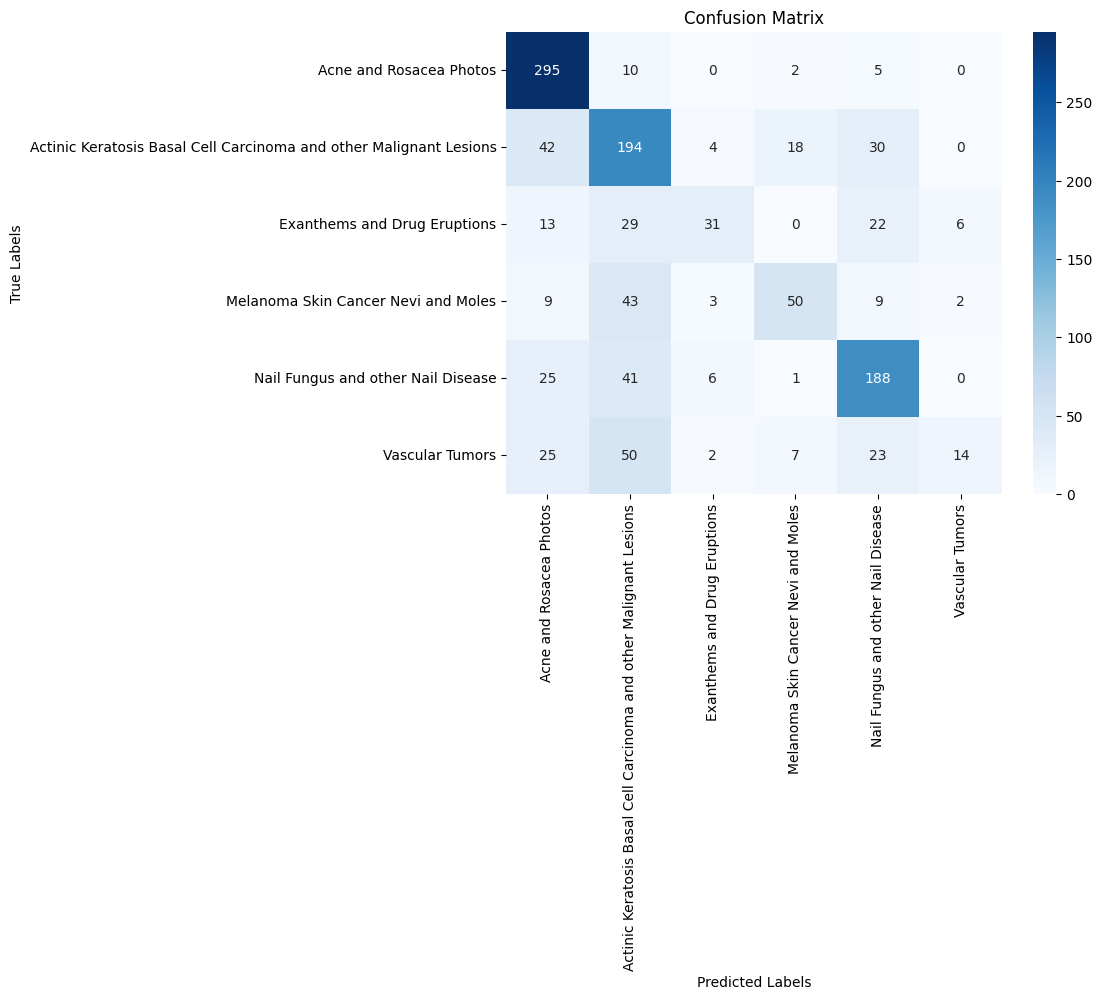

In [24]:
import joblib
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
rf_model = joblib.load("/Users/anishvirkhare/Downloads/random_forest_best_classes.pkl")

# Function to evaluate the model
def evaluate_model(model, X_test, y_test_encoded):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print classification report (precision, recall, f1-score)
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate the model on the test data
evaluate_model(rf_model, X_test, y_test_encoded)


# xAI for random forest 

Predicted Class: Acne and Rosacea Photos


  0%|          | 0/1000 [00:00<?, ?it/s]

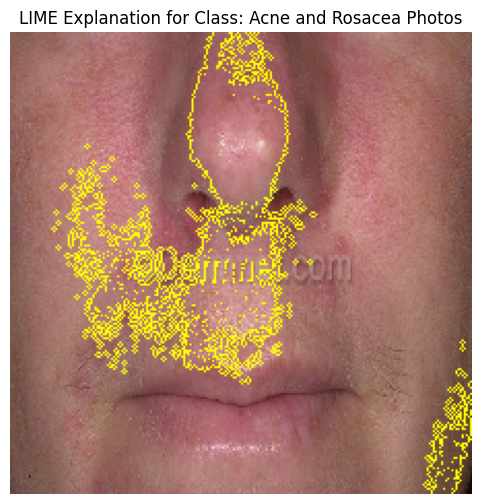

In [29]:
import os
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet50 import preprocess_input
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Initialize Label Encoder
le = LabelEncoder()

# Load the class labels used during training
data_path = '/Users/anishvirkhare/Downloads/archive/train'
classes = sorted([folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))])
le.fit(classes)

# Load the trained Random Forest model
model_path = "/Users/anishvirkhare/Downloads/random_forest_model.pkl"  # Adjust the path if necessary
rf_model = joblib.load(model_path)

# Function to preprocess input image
def preprocess_image(image_path, image_size=(224, 224)):
    # Read the image from file
    img = cv2.imread(image_path)
    
    # Resize the image to match the input size expected by the model
    img = cv2.resize(img, image_size)
    
    # Preprocess the image: Apply ResNet50 preprocessing
    img = preprocess_input(img)
    
    return img  # Return the preprocessed image (not flattened)
    print(img.shape)

# Function to predict probabilities (required by LIME)
def predict_proba(images):
    images_flattened = [img.flatten() for img in images]  # Flatten images for Random Forest
    return rf_model.predict_proba(images_flattened)

# Path to the image you want to test
test_image_path = '/Users/anishvirkhare/Downloads/archive/train/Acne and Rosacea Photos/rosacea-steroid-3.jpg'  # Replace with the actual image path

# Preprocess the test image for prediction
original_image = preprocess_image(test_image_path)
X_new = np.array([original_image.flatten()])  # Flatten the image for Random Forest input

# Make a prediction using the trained Random Forest model
y_pred = rf_model.predict(X_new)

# Decode the predicted label (convert numerical label back to class name)
predicted_class = le.inverse_transform(y_pred)
print(f"Predicted Class: {predicted_class[0]}")

# LIME Explanation
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    original_image,
    predict_proba,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Visualize the explanation for the top predicted class
top_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    top_label,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

from skimage.segmentation import mark_boundaries

# Scale the original image back to [0, 1] for proper visualization
image_rescaled = (original_image - original_image.min()) / (original_image.max() - original_image.min())

# Visualize the explanation with boundaries
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(image_rescaled, mask))
plt.title(f"LIME Explanation for Class: {predicted_class[0]}")
plt.axis('off')
plt.show()


# ResNet50 (8 classes)

In [20]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_train_dir = '/Users/anishvirkhare/Downloads/8_classes_train'  # Original train directory

new_train_dir = '/Users/anishvirkhare/Downloads/8_/train'  # New train directory
validation_dir = '/Users/anishvirkhare/Downloads/8_/validation'  # New validation directory

# Split ratio
validation_split = 0.1  # 10% for validation

# Create new directories for train and validation
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Iterate through each class folder and split
for class_folder in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_folder)
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files

    # Get all files in the class folder
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Split files into train and validation sets
    train_files, val_files = train_test_split(files, test_size=validation_split, random_state=42)

    # Create class subdirectories in train and validation directories
    train_class_dir = os.path.join(new_train_dir, class_folder)
    val_class_dir = os.path.join(validation_dir, class_folder)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Move files to the respective directories
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))

    for file in val_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(val_class_dir, file))

print("Train and validation data split completed.")
print(f"New train directory: {new_train_dir}")
print(f"Validation directory: {validation_dir}")


Train and validation data split completed.
New train directory: /Users/anishvirkhare/Downloads/8_/train
Validation directory: /Users/anishvirkhare/Downloads/8_/validation


In [25]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to directories
train_dir = '/Users/anishvirkhare/Downloads/8_/train'  # Path to training data
val_dir = '/Users/anishvirkhare/Downloads/8_/validation'  # Path to validation data

# Parameters
IMG_SIZE = (224, 224)  # Image size for ResNet (standard input size)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 8  # Number of classes (8 classes in your case)

# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize image pixels
val_datagen = ImageDataGenerator(rescale=1./255)  # Normalize image pixels

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Categorical for multi-class classification
    shuffle=True  # Shuffle training data
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Categorical for multi-class classification
    shuffle=False  # Do not shuffle validation data
)

print(f"Training batches: {len(train_generator)}")
print(f"Validation batches: {len(val_generator)}")

# ResNet50 base model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model to train all layers
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary to verify architecture
model.summary()

Found 8480 images belonging to 8 classes.
Found 945 images belonging to 8 classes.
Training batches: 265
Validation batches: 30


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,640,904 (94.00 MB)

 Trainable params: 24,587,784 (93.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Train the model (training all layers, no freezing)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Optionally, save the model
model.save('/Users/anishvirkhare/Downloads/ResNet50(8 classes).h5')  # Adjust save path as needed

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1910s 7s/step - accuracy: 0.2936 - loss: 2.0342 - val_accuracy: 0.1376 - val_loss: 3.8221
Epoch 2/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 2264s 9s/step - accuracy: 0.4267 - loss: 1.5713 - val_accuracy: 0.1132 - val_loss: 2.7173
Epoch 3/10
 39/265 ━━━━━━━━━━━━━━━━━━━━ 29:42 8s/step - accuracy: 0.4869 - loss: 1.3942